# Pracatical 3

Implement linear regression from scratch using one and multiple variables, and visualise and interpret the resulting models.


In [40]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt

In [41]:
# --- Single Variable Linear Regression ---
# Synthetic dataset: house size (x) vs. price (y)

x_train = np.array([1.0, 2.0, 3.0, 4.0])      # feature: size in 1000 sq. ft
y_train = np.array([300.0, 500.0, 700.0, 900.0])  # target: price in $1000s

In [42]:
# --- Compute Cost ---

def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i])**2
    total_cost = cost / (2 * m)
    return total_cost

In [43]:
# --- Compute Gradient ---

def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw += (f_wb - y[i]) * x[i]
        dj_db += (f_wb - y[i])
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

In [44]:
# --- Gradient Descent ---

def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    J_history = []
    p_history = []
    w, b = w_in, b_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db

        if i < 100000:  # store cost for plotting
            J_history.append(cost_function(x, y, w, b))
            p_history.append([w, b])

        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e}, dj_dw={dj_dw:0.3e}, dj_db={dj_db:0.3e}, w={w:0.3e}, b={b:0.3e}")

    return w, b, J_history, p_history

In [45]:
# --- Run Gradient Descent (Single Variable) ---

w_init, b_init = 0, 0
iterations = 10000
alpha = 1.0e-2

w_final, b_final, J_hist, p_hist = gradient_descent(
    x_train, y_train, w_init, b_init, alpha, iterations, compute_cost, compute_gradient
)

print(f"\nFinal parameters (w, b): ({w_final:.4f}, {b_final:.4f})")


Iteration    0: Cost 1.72e+05, dj_dw=-1.750e+03, dj_db=-6.000e+02, w=1.750e+01, b=6.000e+00
Iteration 1000: Cost 3.42e+00, dj_dw=3.262e-01, dj_db=-9.591e-01, w=2.022e+02, b=9.360e+01
Iteration 2000: Cost 1.71e-01, dj_dw=7.293e-02, dj_db=-2.144e-01, w=2.005e+02, b=9.857e+01
Iteration 3000: Cost 8.54e-03, dj_dw=1.630e-02, dj_db=-4.794e-02, w=2.001e+02, b=9.968e+01
Iteration 4000: Cost 4.27e-04, dj_dw=3.645e-03, dj_db=-1.072e-02, w=2.000e+02, b=9.993e+01
Iteration 5000: Cost 2.13e-05, dj_dw=8.149e-04, dj_db=-2.396e-03, w=2.000e+02, b=9.998e+01
Iteration 6000: Cost 1.07e-06, dj_dw=1.822e-04, dj_db=-5.356e-04, w=2.000e+02, b=1.000e+02
Iteration 7000: Cost 5.33e-08, dj_dw=4.073e-05, dj_db=-1.197e-04, w=2.000e+02, b=1.000e+02
Iteration 8000: Cost 2.66e-09, dj_dw=9.105e-06, dj_db=-2.677e-05, w=2.000e+02, b=1.000e+02
Iteration 9000: Cost 1.33e-10, dj_dw=2.036e-06, dj_db=-5.985e-06, w=2.000e+02, b=1.000e+02

Final parameters (w, b): (200.0000, 100.0000)


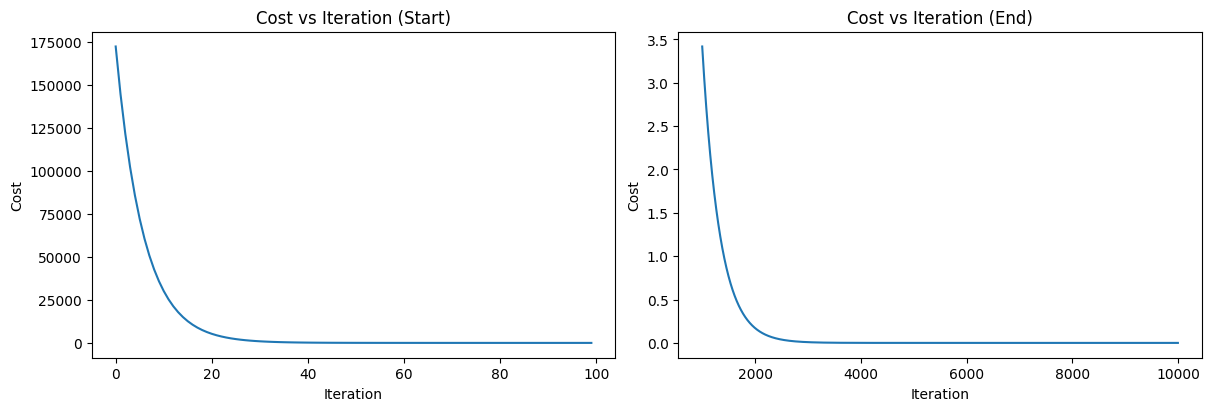

In [46]:
# --- Plot Cost vs Iteration ---

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs Iteration (Start)")
ax2.set_title("Cost vs Iteration (End)")
ax1.set_xlabel("Iteration")
ax2.set_xlabel("Iteration")
ax1.set_ylabel("Cost")
ax2.set_ylabel("Cost")
plt.show()

In [47]:
# --- Multiple Variable Linear Regression ---
# Synthetic dataset: [size (1000 sq ft), bedrooms, age (years)] → price ($1000s)

X_train = np.array([
    [2104, 3, 20],
    [1600, 3, 15],
    [2400, 3, 30],
    [1416, 2, 20],
    [3000, 4, 8]
])
Y_train = np.array([400, 330, 369, 232, 540])

In [48]:
# --- Compute Cost (Multiple Variables) ---

def compute_cost_multiple(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost += (f_wb_i - y[i])**2
    return cost / (2 * m)

In [49]:
# --- Compute Gradient (Multiple Variables) ---

def compute_gradient_multiple(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros(n)
    dj_db = 0.0

    for i in range(m):
        err = np.dot(X[i], w) + b - y[i]
        dj_dw += err * X[i]
        dj_db += err

    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

In [50]:
# --- Gradient Descent (Multiple Variables) ---

def gradient_descent_multiple(X, y, w_init, b_init, cost_function, gradient_function, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_init)
    b = b_init

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(X, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db

        if i < 100000:
            J_history.append(cost_function(X, y, w, b))

        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")

    print(f"Final iteration {i:4d}: Cost {J_history[-1]:8.2f}")
    return w, b, J_history

In [51]:
# --- Run Gradient Descent (Multiple Variables) ---

w_init = np.zeros(X_train.shape[1])
b_init = 0.0
iterations = 50000
alpha = 1e-10

w_final, b_final, J_hist = gradient_descent_multiple(
    X_train, Y_train, w_init, b_init, compute_cost_multiple, compute_gradient_multiple, alpha, iterations
)

print(f"\nFinal parameters:\nw = {w_final}\nb = {b_final:.4f}")

Iteration    0: Cost 74977.83
Iteration 5000: Cost  1291.42
Iteration 10000: Cost   655.06
Iteration 15000: Cost   649.55
Iteration 20000: Cost   649.49
Iteration 25000: Cost   649.48
Iteration 30000: Cost   649.47
Iteration 35000: Cost   649.46
Iteration 40000: Cost   649.45
Iteration 45000: Cost   649.44
Final iteration 49999: Cost   649.43

Final parameters:
w = [0.17697814 0.00030199 0.00070039]
b = 0.0001


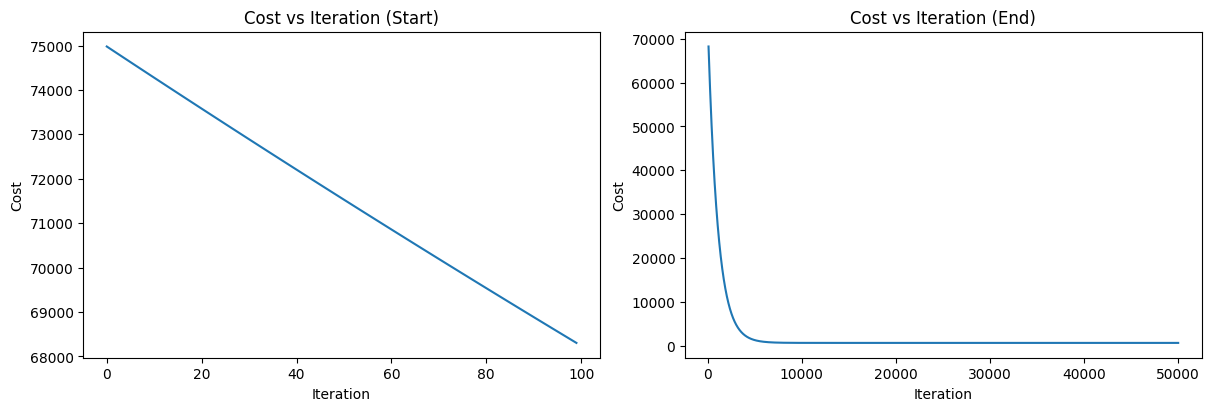

In [52]:
# --- Plot Cost vs Iteration (Multiple Variables) ---

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)
ax1.plot(J_hist[:100])
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs Iteration (Start)")
ax2.set_title("Cost vs Iteration (End)")
ax1.set_xlabel("Iteration")
ax2.set_xlabel("Iteration")
ax1.set_ylabel("Cost")
ax2.set_ylabel("Cost")
plt.show()